In [1]:
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import clima_anom as ca
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon
import matplotlib.gridspec as gridspec

from scipy import interpolate

## ESTE CODIGO CREA SPI PARA EL PERIODO TOTAL

In [2]:
file_shape = '../shape/NORDESTE.shp'
shape = list(shpreader.Reader(file_shape).geometries())

In [3]:
# title='1901_2013'

# title = '1981_2013'

title = '1850_2013'

# 850 a 1849
# title='TOTAL'
# title='MCA' 
# title='LIA'

In [5]:
if title == '1901_2013' or title == '1850_2013' or title == '1981_2013':
    print('Moderno')
    filename = '../data/in/pr_MRI-ESM2-0_historical_spi.nc'
elif title == 'TOTAL' or title == 'MCA' or title == 'LIA':
    print('Last Million')
    filename = '../data/in/pr_MRI-ESM2_past1000_spi_gamma_03_ord.nc'

data = ca.read_netcdf(filename,2)

Moderno
time : (1980,)
lon : (90,)
lat : (58,)
spi_gamma_03 : (1980, 58, 90)


/home/arturo/anaconda3/envs/CART/lib/python3.8/site-packages/clima_anom/clima_anom.py:313: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  globals()[var_list[i]] = data.variables[var_list[i]][:]
/home/arturo/anaconda3/envs/CART/lib/python3.8/site-packages/clima_anom/clima_anom.py:313: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  globals()[var_list[i]] = data.variables[var_list[i]][:]


In [6]:
lat = data['lat']
lon = data['lon']
tim = data['time']
spi = data['spi_gamma_03'].data

In [7]:
lon_lim = np.where((lon>=-50) & (lon<=-33))
lat_lim = np.where((lat<=0) & (lat>=-19))

In [8]:
lat = lat[lat_lim[0][0]:lat_lim[0][-1]+1]
lon = lon[lon_lim[0][0]:lon_lim[0][-1]+1]
spi = spi[:,lat_lim[0][0]:lat_lim[0][-1]+1,lon_lim[0][0]:lon_lim[0][-1]+1]

In [9]:
lon2d, lat2d = np.meshgrid(lon, lat)

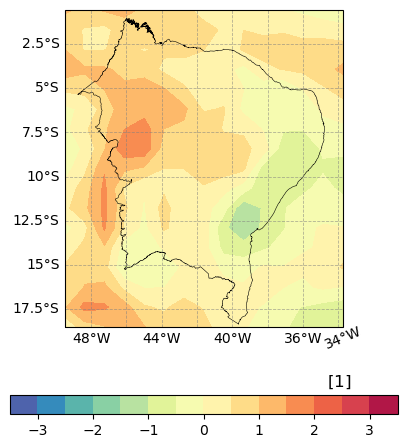

In [10]:
levels = np.arange(-3.5,4,0.5)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

plt.figure(figsize=(5,6),dpi=100)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0], projection = proj) 
ax1.add_geometries(shape,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.4)
a1 = ax1.contourf(lon2d, lat2d, spi[11,:,:], levels=levels, cmap = cmap)
bar1 = plt.colorbar(a1,orientation="horizontal")
bar1.ax.set_title('$[1]$',position=(0.85,1), fontsize=12)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False

In [11]:
if title == '1901_2013':
    print(title)
    print('Time start  : ',tim[612])
    print('Time end    : ',tim[-13])
    spi = spi[612:-12,:,:]
    
if title == '1850_2013':
    print(title)
    print('Time start  : ',tim[0])
    print('Time end    : ',tim[-13])
    spi = spi[0:-12,:,:]
    
elif title == '1981_2013':
    print(title)
    print('Time start  : ',tim[1572])
    print('Time end    : ',tim[-13])
    spi = spi[1572:-12,:,:]
    
elif title == 'TOTAL':
    print(title)
    print('Time start  : ',tim[0])
    print('Time end    : ',tim[-1])
    spi = spi[:,:,:]
    
elif title == 'LIA':
    print(title)
    print('Time start  : ',tim[0])
    print('Time end    : ',tim[4211])
    spi = spi[0:4212,:,:]
    
elif title == 'MCA':
    print(title)
    print('Time start  : ',tim[7800])
    print('Time end    : ',tim[-1])
    spi = spi[7800:,:,:]

print('Dimensiones :',np.shape(spi))    

1850_2013
Time start  :  1850-01-16 12:00:00
Time end    :  2013-12-16 12:00:00
Dimensiones : (1968, 17, 15)


In [12]:
nt, ny, nx = np.shape(spi)
print(nt, ny, nx)

1968 17 15


In [13]:
for i in range(4):
    print('Lat: ',lat[i+1]-lat[i],'Lon: ',lon[i+1]-lon[i])

Lat:  1.1214900000000014 Lon:  1.125
Lat:  1.1214899999999979 Lon:  1.125
Lat:  1.1214900000000014 Lon:  1.125
Lat:  1.1214899999999997 Lon:  1.125


In [14]:
# INTERPOLANDO LAT Y LON
resolucion = 0.25
lon_inter = np.arange(lon[0],lon[-1]+resolucion,resolucion)
resolucion = 0.25
lat_inter = np.arange(lat[0],lat[-1]+resolucion,resolucion)

In [15]:
spi_inter = np.zeros([nt,len(lat_inter),len(lon_inter)])

for t in range(nt):
    f = interpolate.interp2d(lon, lat, spi[t,:,:], kind='cubic')
    spi_inter[t,:,:] = f(lon_inter, lat_inter)

In [16]:
lon2d_inter, lat2d_inter = np.meshgrid(lon_inter,lat_inter)

In [17]:
spi_NW_inter = ca.extract_shapefile('../shape/NORDESTE.shp',spi_inter,lat_inter,lon_inter)
spi_NW_inter.shape

(1968, 73, 64)

Text(0.85, 1.0, '$[1]$')

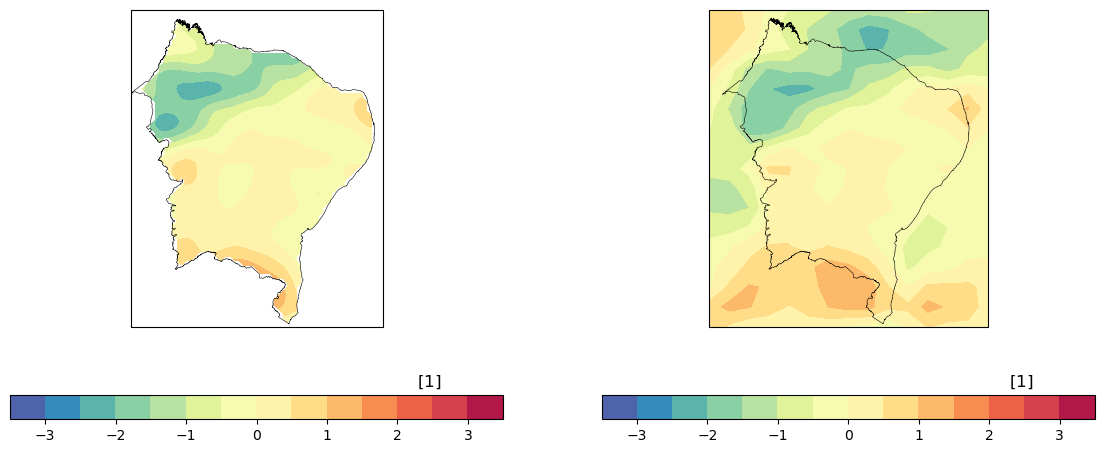

In [18]:
levels = np.arange(-3.5,4,0.5)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

plt.figure(figsize=(14,6),dpi=100)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj) 
ax1.add_geometries(shape,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.4)
a1 = ax1.contourf(lon2d_inter, lat2d_inter, spi_NW_inter[3,:,:], levels=levels, cmap = cmap)
bar1 = plt.colorbar(a1,orientation="horizontal")
bar1.ax.set_title('$[1]$',position=(0.85,1), fontsize=12)

ax2 = plt.subplot(gs[0, 1], projection = proj) 
ax2.add_geometries(shape,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.4)
a2 = ax2.contourf(lon2d, lat2d, spi[3,:,:], levels=levels, cmap = cmap)
bar2 = plt.colorbar(a2,orientation="horizontal")
bar2.ax.set_title('$[1]$',position=(0.85,1), fontsize=12)

In [19]:
dim = np.shape(spi_NW_inter)
print(title)

if title == '1901_2013':
    print('Dimensiones de SPI: ',dim)
    info = {'file': '../data/out/SPI_MRI_'+title+'_NORDESTE.nc', # filename and directory
        'title': 'SPI Index', # netcdf title
        'year_start':1901,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0, # time start (year,month,day,hour,minute)
        'year_end':2013,'month_end':12,'day_end':18,'hour_end':23,'minute_end':59, # time end (year,month,day,hour,minute)
        'time_frequency': 'Monthly', # options: Monthly, Daily, Hourly, Minutely
        'time_interval':1,
        'var_name': 'spi', # variable short name
        'var_units': 'mm'} # variable units
    
elif title == '1850_2013':
    print('Dimensiones de SPI: ',dim)
    info = {'file': '../data/out/SPI_MRI_'+title+'_NORDESTE.nc', # filename and directory
        'title': 'SPI Index', # netcdf title
        'year_start':1850,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0, # time start (year,month,day,hour,minute)
        'year_end':2013,'month_end':12,'day_end':18,'hour_end':23,'minute_end':59, # time end (year,month,day,hour,minute)
        'time_frequency': 'Monthly', # options: Monthly, Daily, Hourly, Minutely
        'time_interval':1,
        'var_name': 'spi', # variable short name
        'var_units': 'mm'} # variable units
    
elif title == '1981_2013':
    print('Dimensiones de SPI: ',dim)
    info = {'file': '../data/out/SPI_MRI_'+title+'_NORDESTE.nc', # filename and directory
        'title': 'SPI Index', # netcdf title
        'year_start':1981,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0, # time start (year,month,day,hour,minute)
        'year_end':2013,'month_end':12,'day_end':18,'hour_end':23,'minute_end':59, # time end (year,month,day,hour,minute)
        'time_frequency': 'Monthly', # options: Monthly, Daily, Hourly, Minutely
        'time_interval':1,
        'var_name': 'spi', # variable short name
        'var_units': 'mm'} # variable units
    
elif title == 'TOTAL':
    print('Dimensiones de SPI: ',dim)
    info = {'file': '../data/out/SPI_MRI_'+title+'_NORDESTE.nc', # filename and directory
        'title': 'SPI Index', # netcdf title
        'year_start':850,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0, # time start (year,month,day,hour,minute)
        'year_end':1849,'month_end':12,'day_end':18,'hour_end':23,'minute_end':59, # time end (year,month,day,hour,minute)
        'time_frequency': 'Monthly', # options: Monthly, Daily, Hourly, Minutely
        'time_interval':1,
        'var_name': 'spi', # variable short name
        'var_units': 'mm'} # variable units
    
elif title == 'MCA':
    print('Dimensiones de SPI: ',dim)
    info = {'file': '../data/out/SPI_MRI_'+title+'_NORDESTE.nc', # filename and directory
        'title': 'SPI Index', # netcdf title
        'year_start':850,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0, # time start (year,month,day,hour,minute)
        'year_end':1200,'month_end':12,'day_end':18,'hour_end':23,'minute_end':59, # time end (year,month,day,hour,minute)
        'time_frequency': 'Monthly', # options: Monthly, Daily, Hourly, Minutely
        'time_interval':1,
        'var_name': 'spi', # variable short name
        'var_units': 'mm'} # variable units
    
elif title == 'LIA':
    print('Dimensiones de SPI: ',dim)
    info = {'file': '../data/out/SPI_MRI_'+title+'_NORDESTE.nc', # filename and directory
        'title': 'SPI Index', # netcdf title
        'year_start':1500,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0, # time start (year,month,day,hour,minute)
        'year_end':1849,'month_end':12,'day_end':18,'hour_end':23,'minute_end':59, # time end (year,month,day,hour,minute)
        'time_frequency': 'Monthly', # options: Monthly, Daily, Hourly, Minutely
        'time_interval':1,
        'var_name': 'spi', # variable short name
        'var_units': 'mm'} # variable units

print('Salida :',info['file'])

1850_2013
Dimensiones de SPI:  (1968, 73, 64)
Salida : ../data/out/SPI_MRI_1850_2013_NORDESTE.nc


In [20]:
ca.create_netcdf(info,lat_inter,lon_inter,spi_NW_inter)

Time Start: 1850-01-01 00:00:00
Time End: 2013-12-01 00:00:00
Time Frequency: Monthly
Time Lenght: 1968

File created in:  ../data/out/SPI_MRI_1850_2013_NORDESTE.nc
File title:  SPI Index
var title:  spi
var units:  mm
